<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#imports" data-toc-modified-id="imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>imports</a></span></li><li><span><a href="#data" data-toc-modified-id="data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>data</a></span></li><li><span><a href="#algo" data-toc-modified-id="algo-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>algo</a></span></li><li><span><a href="#wrap" data-toc-modified-id="wrap-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>wrap</a></span></li></ul></div>

# imports

In [2]:
import pandas as pd
import numpy as np
import cv2
import skimage.io
from imp import reload
import seam_carve as sc

# data

In [3]:
reload(sc)

<module 'seam_carve' from 'D:\\Courses\\shad2018\\CV\\hw2\\seam_carve.py'>

In [81]:
n_input = 2

In [82]:
image = skimage.io.imread('./public_data/0%d_input/img.png' % n_input)
mask = skimage.io.imread('./public_data/0%d_input/mask.png' % n_input)

def convert_img_to_mask(img):
    return ((img[:, :, 0] != 0) * -1 + (img[:, :, 1] != 0)).astype('int8')
mask = convert_img_to_mask(mask)

from os.path import join
from pickle import load
gt_seams = []
with open(join('./public_data/0%d_gt/' % n_input, 'seams'), 'rb') as fgt:
    for i in range(8):
        gt_seams.append(load(fgt))


# wrap

In [83]:
def get_mask(seam, image):
    seam_mask = np.full(image.shape, False)
    for i in seam:
        seam_mask[i] = True
    return seam_mask

In [84]:
import itertools

(None, 'shrink', 'horizontal')


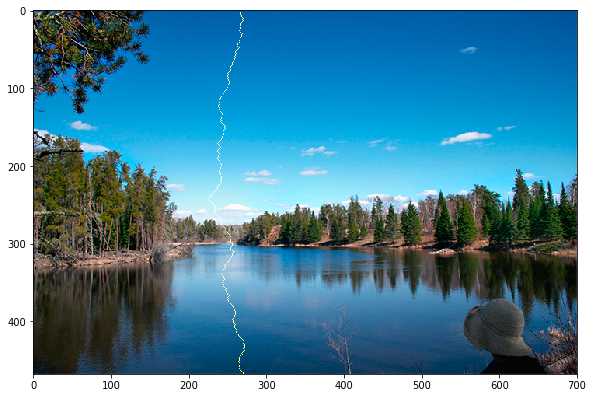

(None, 'shrink', 'vertical')


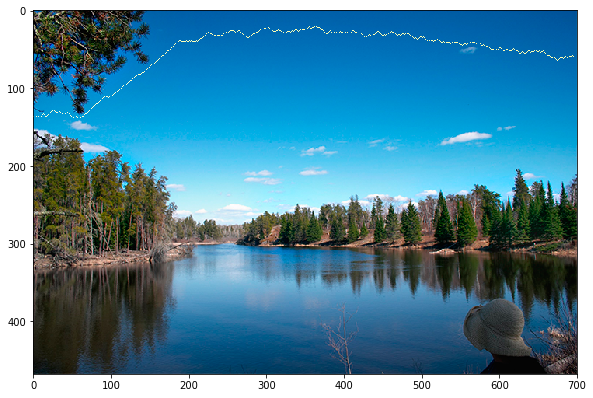

(None, 'expand', 'horizontal')


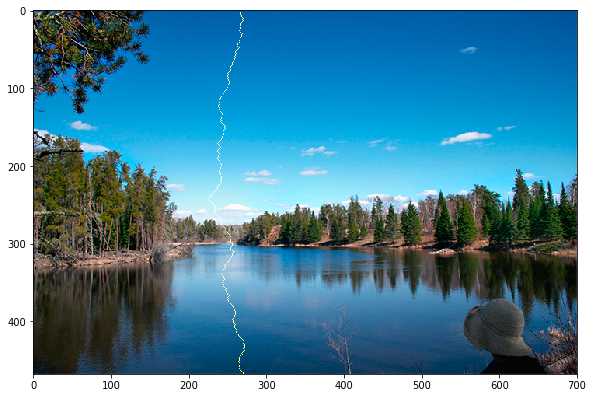

(None, 'expand', 'vertical')


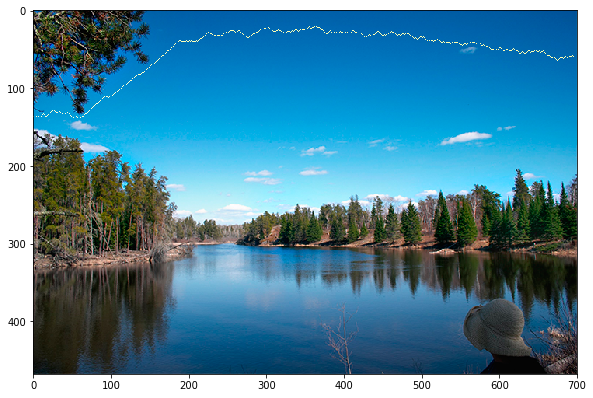

(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int8), 'shrink', 'horizontal')


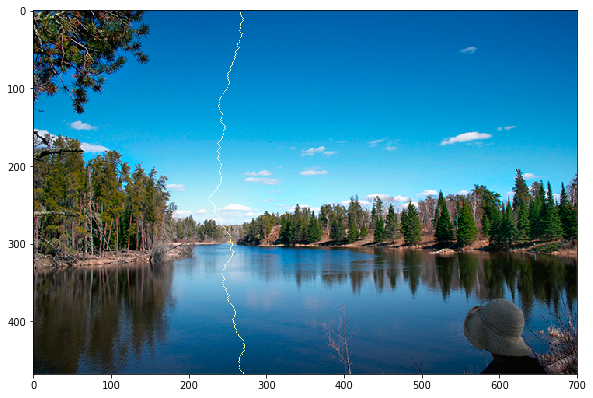

(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int8), 'shrink', 'vertical')


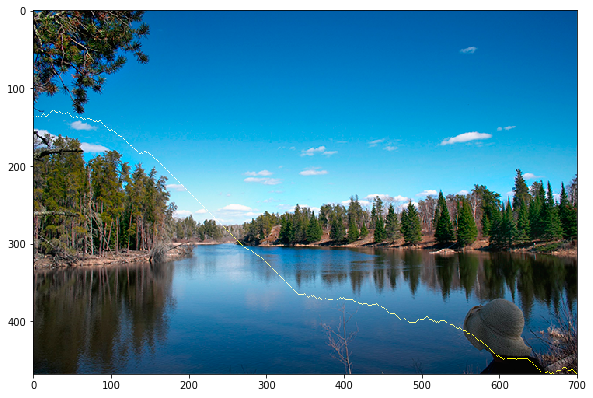

(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int8), 'expand', 'horizontal')


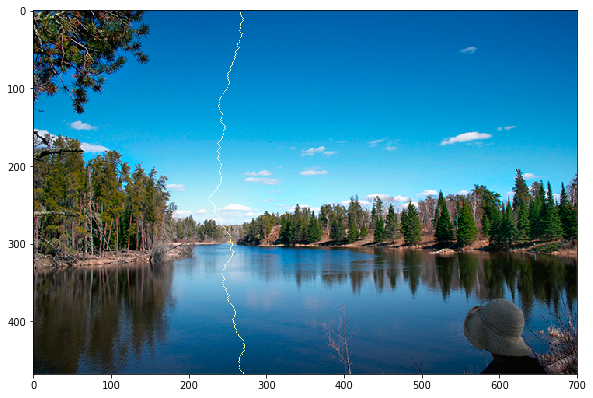

(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int8), 'expand', 'vertical')


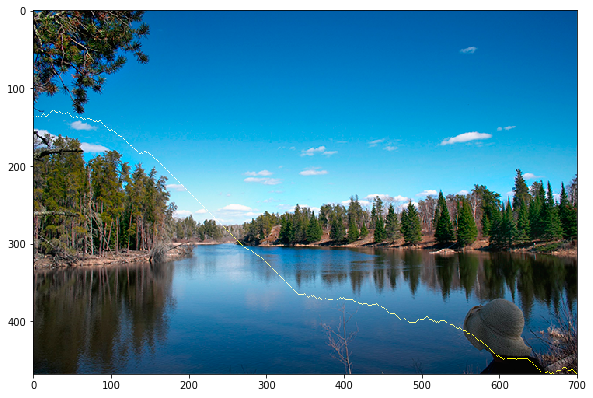

In [85]:
options = list(itertools.product((None, mask), ('shrink', 'expand'), ('horizontal', 'vertical')))
for i in range(8):
    print(options[i])
    im2 = image.copy()
    seam = sc.seam_carve(image.copy(), ' '.join(options[i][1:][::-1]), options[i][0])[2]
    im2[seam, 0] = 255
    im2[get_mask(gt_seams[i], im2[:, :, 0]), 1] = 255
    sc.show_image(im2)

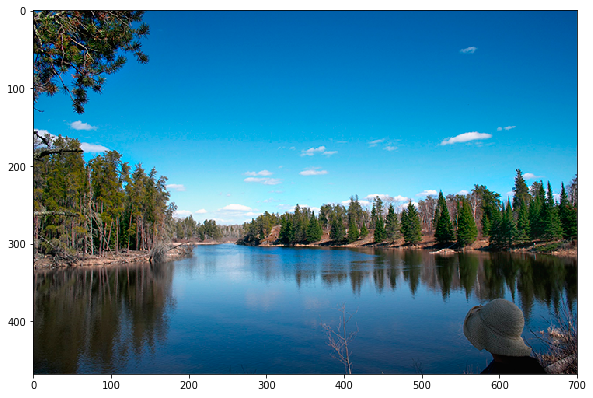

99


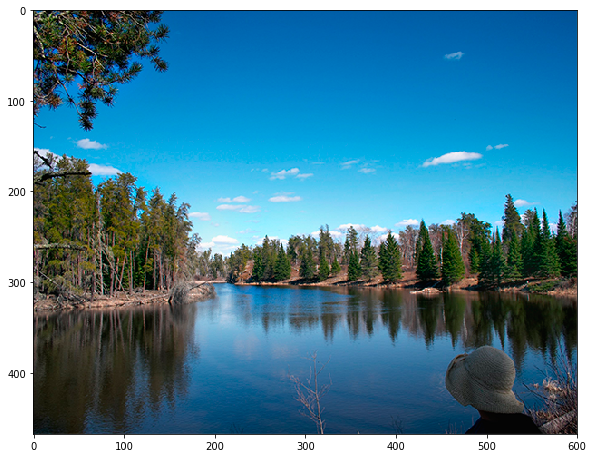

In [86]:
im = image.copy()
sc.show_image(image)
for i in range(100):
    im, mask, seam = sc.seam_carve(im, 'shrink horizontal', None)
print(i)
sc.show_image(im)